In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To display all columns
pd.set_option('display.max_columns', None)

In [5]:
# Load the dataset (after downloading from Kaggle)
from google.colab import files

uploaded = files.upload()

df = pd.read_csv("titanic.csv")

# Basic info
print(df.shape)
print(df.info())
print(df.describe())
print(df.head())

# Check for nulls
print(df.isnull().sum())

Saving titanic.csv to titanic.csv
(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118 

In [6]:
# Fill Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin due to too many nulls
df.drop(columns=['Cabin'], inplace=True)

<ipython-input-6-778a0db35d32>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-6-778a0db35d32>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [7]:
# Label Encoding for Sex
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encoding for Embarked
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [8]:
from sklearn.preprocessing import StandardScaler

# Choose numeric columns
num_cols = ['Age', 'Fare']

# Standardize
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

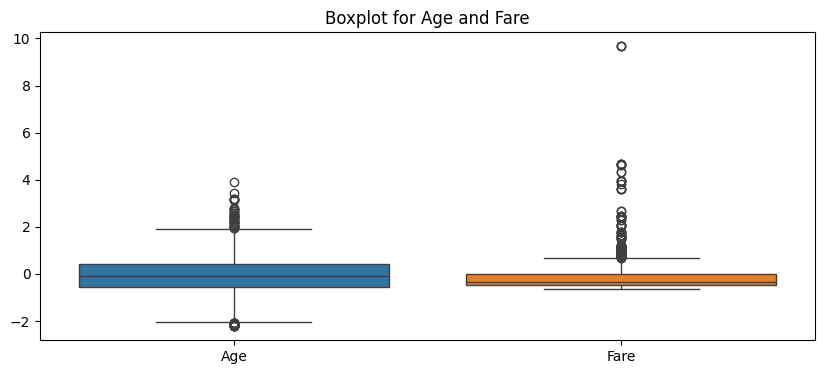

In [9]:
# Boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("Boxplot for Age and Fare")
plt.show()

# Remove outliers using IQR
for col in ['Age', 'Fare']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [11]:
df.to_csv("titanic_cleaned.csv", index=False)